## 목표 : 온라인 강의 기회 종류별(format) 분석 및 매출 향상 방향

### 사용한 모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

각종 옵션

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_info_columns =200

# 한글폰트 깨짐 방지
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 실수 표현 옵션
pd.options.display.float_format = '{:.1f}'.format
pd.options.display.float_format = '{:,}'.format

 자료 가져오기

In [3]:
url = 'C:/Users/hojun/Documents/dev/FC_MINI_PROJECT/데이터분석프로젝트_VER1_210329_210926.xlsx'
data = pd.read_excel(url)

### 분석 자료의 기본 정보 확인

In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  float64       
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  float64       
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

Domain이 문자이고 고유 값들의 분류값이 작은 Column의 고유값

In [5]:
df['course_title'].unique()

array(['올인원 패키지 : 알고리즘 기술면접 완전 정복', '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '시크릿코드 : 프론트엔드 실무 완성편', ..., '(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처',
       '(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)',
       '(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처'], dtype=object)

In [6]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [7]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [8]:
df['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [9]:
df['pg'].unique()

array([nan, 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [10]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [11]:
df['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

### 결측치 확인 후 제외 및 대체값 설정

In [12]:
# 'tax_free_amount' column 삭제
df = df.drop('tax_free_amount', axis = 1)

# 'format'에서 결측치 제거
df['format'] = df['format'].fillna('프로모션')
df = df.drop(df[df['format']=='프로모션'].index)

# 'type'에서 결측치 처리 및 type_drop_list인 row 제거
type_drop_list = ['ORDER', 'TRANSACTION']
for name in type_drop_list:
    df = df.drop(df[df['type']==name].index)

# 'state'에서 state_drop_list인 row 제거
state_drop_list = ['PENDING', 'CANCELLED', 'DELETED', 'REQUESTED']
for name in state_drop_list:
    df = df.drop(df[df['state']==name].index)

# 'pg'의 NaN 값들을 'PG'로 대체
df['pg'] = df['pg'].fillna('PG')

# index reset
df = df.reset_index()

# drop column
df = df.drop(columns="index")

method에서 PROMOTION은 할인율 100% 이므로 매출반영 불가로 drop

In [13]:
print('transaction_amount가 0인것:' , df[df.transaction_amount ==0]['method'].unique())
print('method가 PROMOTION인  transaction_amount는:' , df[df['method']=='PROMOTION']['transaction_amount'].unique())

transaction_amount가 0인것: ['PROMOTION']
method가 PROMOTION인  transaction_amount는: [0.]


In [14]:
# drop column
df = df.drop(df[df['method']=='PROMOTION'].index)

### 구매관련 정보들 분석

최대 금액 구매 고객

In [15]:
df.loc[df['transaction_amount'] == df['transaction_amount'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
10594,"1,039,468.0","512,983.0","204,638.0",PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,"113,400,000.0",NaN,NaN,NaN,PG,TRANSFER,NaN,NaT


단일품목 가장 상품 구매 고객

In [16]:
df.loc[df['sale_price'] == df['sale_price'].max()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
39468,"1,252,478.0","116,416.0","203,992.0",PAYMENT,COMPLETED,(B2B) 하나금융티아이 DT University(2021),크리에이티브,B2B,2021-07-30 15:10:39,"44,600,000.0",NaN,NaN,"44,600,000.0",INICIS,CARD,NaN,NaT


단편적으로 최대 구매 고객과 단일 최고 금액 고객은 모두 format이 B2B인 것을 확인 가능하다.

'subcategory_title' 별 구매 횟수

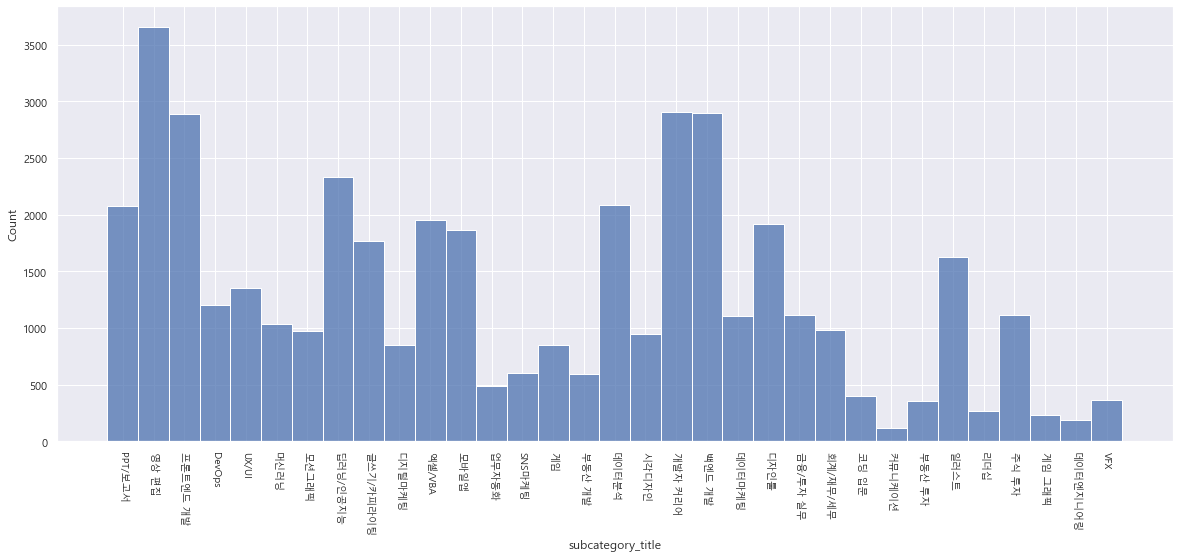

In [17]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='subcategory_title')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

- 기술적인 강의들을 더 많이 신청하는 것으로 나타남

강의 개설의 시간적 추의

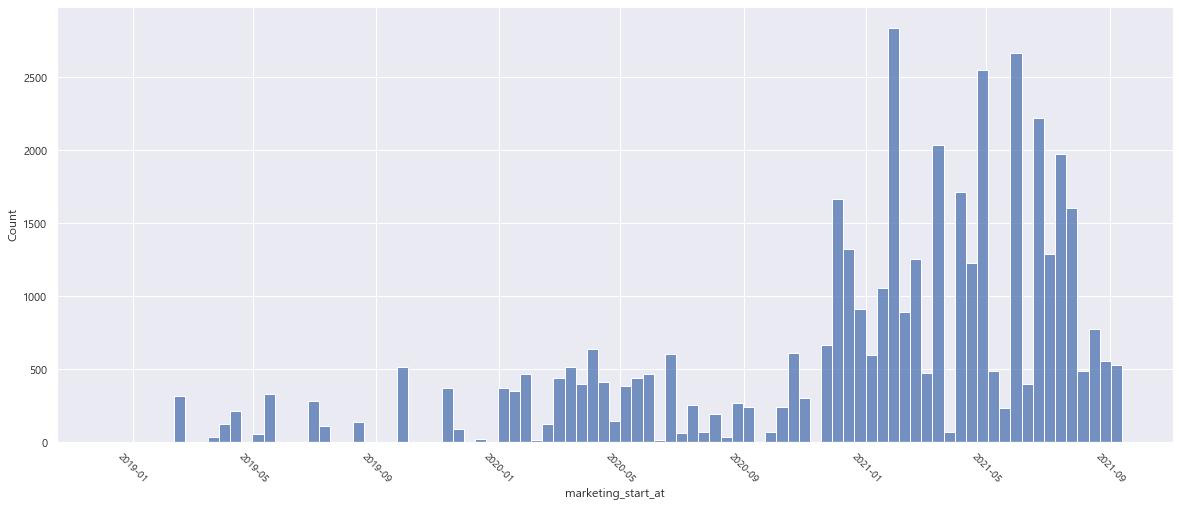

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

- 최근 2021년 부터 강의개설이 폭발적으로 늘어난 것을 확인할 수 있다.

### 결제수단 분석

구매시 결제 경로

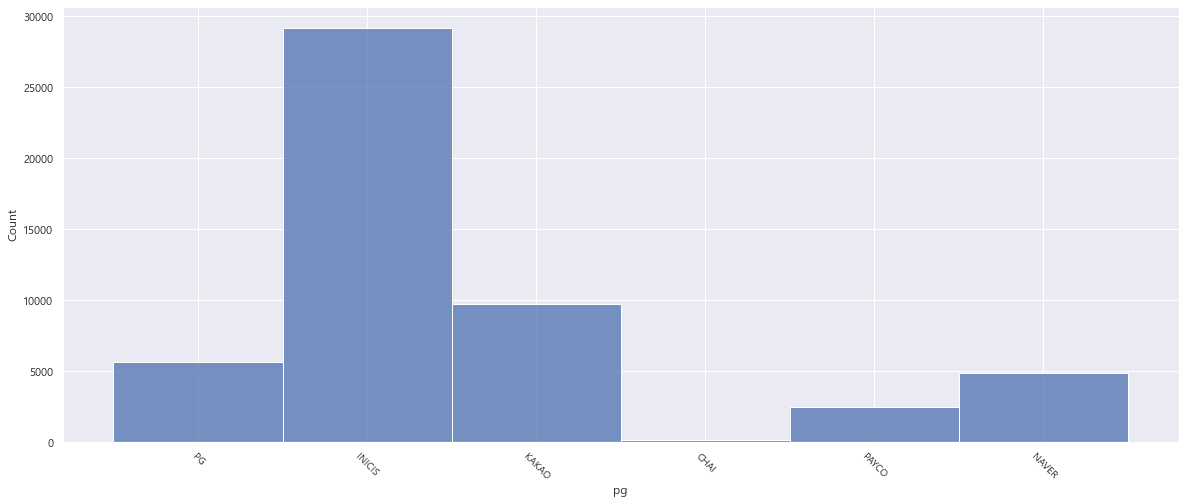

In [19]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='pg')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

구매시 결제 수단

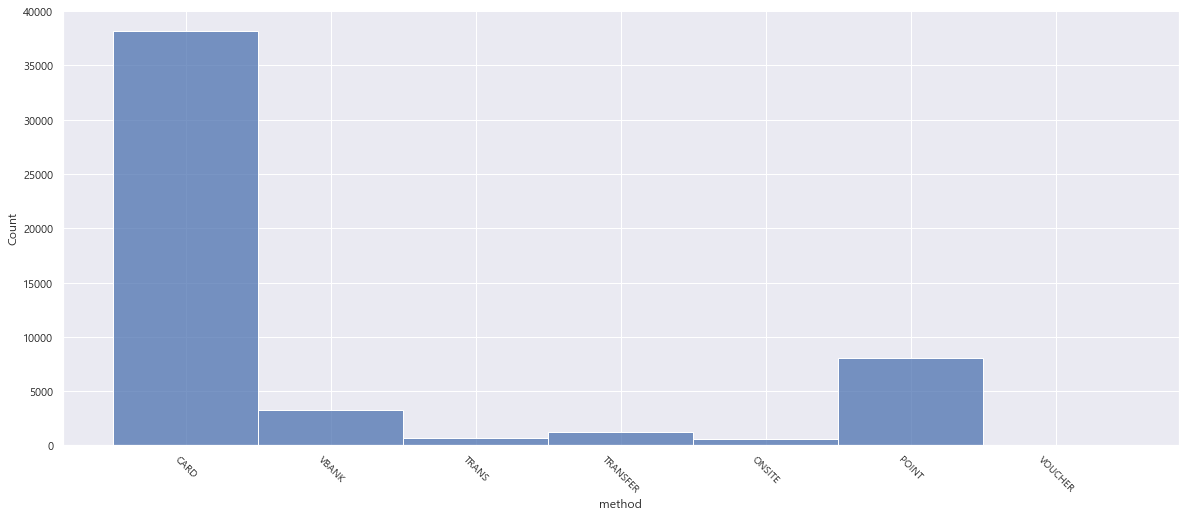

In [20]:
plt.figure(figsize=(20,8))
sns.histplot(data= df, x='method')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

결제 경로와 수단 시각화

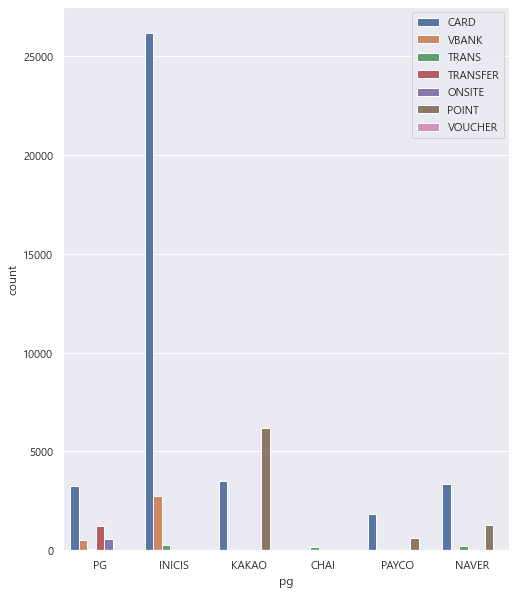

In [21]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, x='pg', hue='method')
plt.ticklabel_format(style='sci', axis='y')
plt.legend(loc='upper right')
plt.show()

- 카드 사용량이 압도적으로 많으므로 해당 사항으로 카드사별 연계상품을 구상가능 (특정카드 할인 등)
- Kakao point의 경우 사용시 접근성이 좋고 쉬운 결제 수단으로 Kakao와 연계상품을 구상가능(Kakao point로 강의 구매시 point payback 이벤트 등)

상관계수로 분석

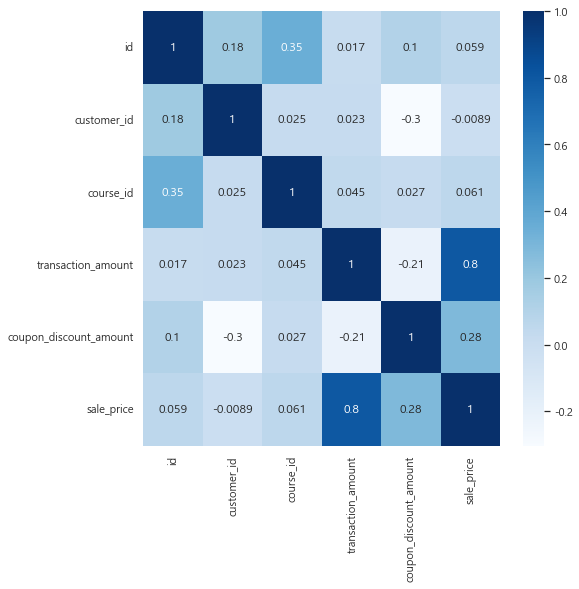

In [22]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data = corr, cmap='Blues', annot=True)
plt.show()

- 쿠폰과 판매 수익과의 음의 상관관계 파악 가능

### format별 세부 내용 분석

format 안 'category_title'별 고객수, 수익

In [23]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum
}

df.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6        24,347,500.0
        데이터사이언스                  25       475,971,780.0
        마케팅                       3       124,222,500.0
        업무 생산성                    5        22,025,500.0
        크리에이티브                    6        59,413,500.0
        프로그래밍                   440        46,747,010.0
B2B 온라인 교육                      922     1,135,978,045.0
        데이터사이언스                  15        65,907,774.0
        마케팅                       6         2,760,000.0
        부동산/금융                    5         2,177,500.0
        비즈니스                      1           360,000.0
        업무 생산성                    1           480,000.0
        크리에이티브                    9         3,660,000.0
        파이낸스                      1           480,000.0
        프로그래밍                    20        16,965,000.0
B2G     마케팅                       1        20,000,000.0
        프로그래밍                   395         8,921,300.0
MBA     지식콘텐츠                    22         4,970,000.0
RED     데이터사이언스                 313        69,105,400.0
        마케팅                    1522       186,580,408.0
        업무 생산성                  104        17,685,000.0
        영상/3D                   276        44,848,400.0
        프로그래밍                  1062       163,213,155.0
관리      관리                        1           150,000.0
스쿨      데이터사이언스                  79        14,608,693.0
        크리에이티브                    5        -2,890,833.0
        프로그래밍                     5       -13,003,206.0
스쿨 온라인  프로그래밍                   369        38,529,132.0
아카이브    크리에이티브                   35         1,895,700.0
온라인 완주반 데이터 사이언스                  5         1,550,000.0
        데이터사이언스                 362       105,298,520.0
        마케팅                     227        65,202,769.0
        비즈니스                      1           314,000.0
        업무 생산성                  185        34,225,900.0
        크리에이티브                  339        77,395,418.0
        프로그래밍                   540       132,878,253.0
올인원     데이터사이언스                6149       771,325,932.0
        디자인                    5852       663,198,168.0
        마케팅                    3047       335,400,147.0
        부동산/금융                 2812       471,823,434.0
        비즈니스                     18         4,620,000.0
        업무 생산성                 5003       493,982,584.0
        영상/3D                  4955       499,857,805.0
        크리에이티브                  542       160,690,042.0
        투자/재테크                 1464       277,706,420.0
        파이낸스                     18         4,620,000.0
        프로그래밍                 13343     1,313,858,001.0
이벤트     데이터사이언스                  19           814,000.0
        마케팅                       7           440,000.0
        부동산/금융                    4           242,000.0
        크리에이티브                   18           892,000.0
        프로그래밍                    41         2,010,000.0
캠프      데이터사이언스                  18        16,320,000.0
        부동산/금융                    4         1,401,500.0
        프로그래밍                     1         1,350,000.0
하루10분컷  비즈니스                      4            95,865.0
        업무 생산성                 1355        26,630,441.0

format별 결제 금액과 환불 금액

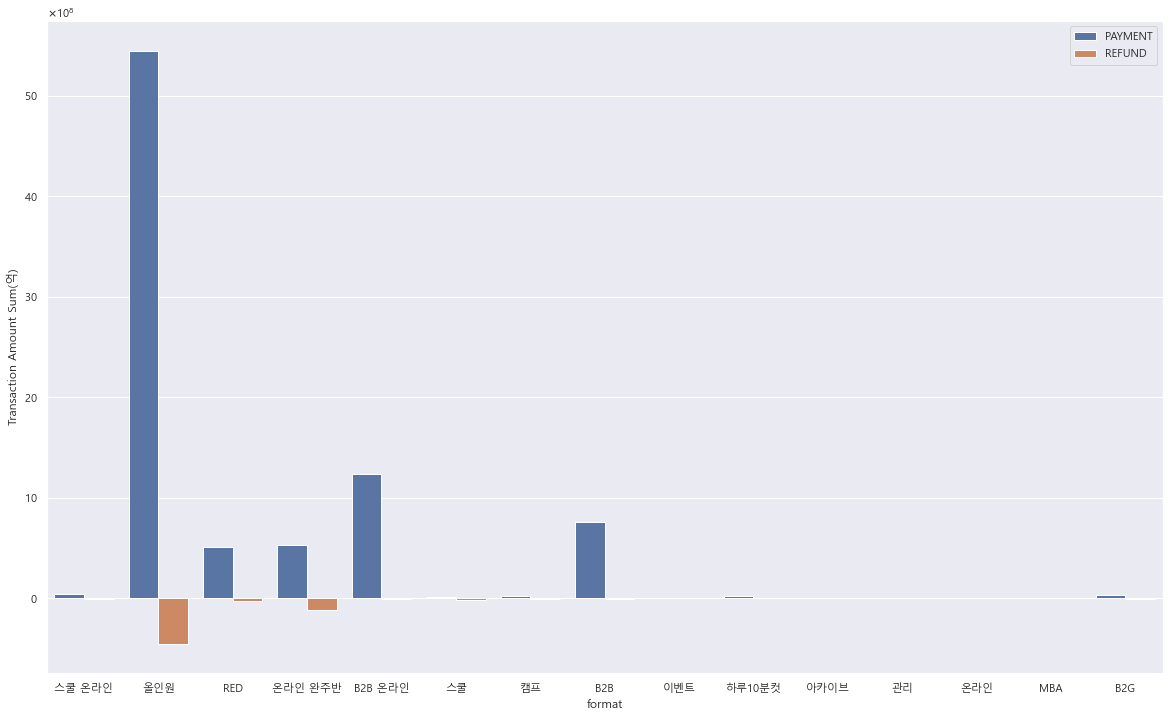

In [24]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.show()

- 전체 매출에 올인원 상품이 대부분을 차지하고 다음으로 B2B(기업강의), 온라인 완주반, RED 순임을 확인 가능하다.

format별 고객수, 수익 Bar Chart 

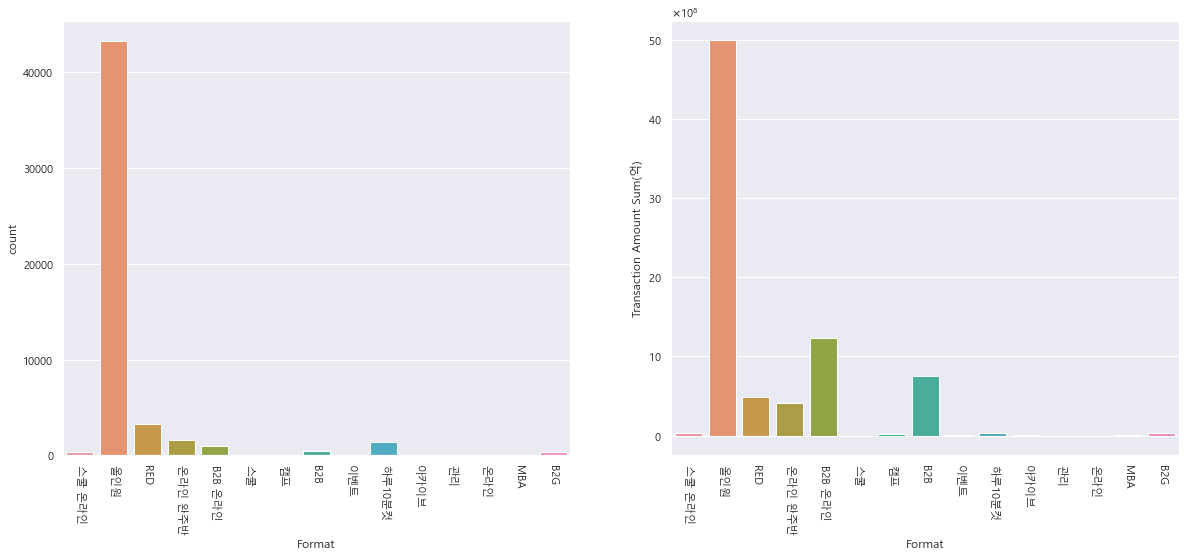

In [25]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='format')
plt.xticks(rotation=-90)
plt.xlabel('Format')


plt.subplot(1, 2, 2)
sns.barplot(data=df, x='format', y='transaction_amount',  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Sum(억)')

plt.show()

- 금액과 강의 신청 수량을 확인 함으로써 더욱 편중된 그래프를 확인가능하다.
- 추후 확인할 항목으로 하루10분컷 format이 매출과는 상이하게 많은 수강수를 확인할 수 있다.
- 하루10분컷 format의 가격인하, 1+1 전략 등으로 유투브의 썸네일과 같은 신규 고객의 접근성과 친숙도를 올리는 전략을 생각해 볼 수 있다. 

format 환불률 계산

In [26]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')

# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')

# format별 환불 비율
format_refund_rate = []

# format array화
format_array = df['format'].unique()

for i in format_array:
    cond = (df['format'] == i)
    
    # 결제승인 == df[cond][cond_payment]
    # 환불승인 == df[cond][cond_refund]
    
    # 결제승인 갯수 = 전체 갯수
    payment = len(df[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(df[cond][cond_refund].index)

    # 환불율 계산
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
    refund_ratio = round(refund_ratio, 3)
    
    format_refund_rate.append(refund_ratio)
format_refund_rate = np.array(format_refund_rate)

C:\Users\hojun\AppData\Local\Temp\ipykernel_29104\3962860543.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payment = len(df[cond][cond_payment].index)
C:\Users\hojun\AppData\Local\Temp\ipykernel_29104\3962860543.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  refund = len(df[cond][cond_refund].index)


format별 결제 금액과 환불 금액, 환불율과 금액별 환불율

In [27]:
# PAYMENT 금액 가져오기
temp_df = df
how = {
    'transaction_amount' : np.sum
}

cond = temp_df[temp_df['type']=='REFUND'].index
temp_df = temp_df.drop(cond)

payment_list = []

completed_only = temp_df.groupby(['format','type','state']).agg(how)
for i in range(len(completed_only)):
    payment_list.append(completed_only.iloc[i,0])
payment_list.insert(9,0)

# REFUND 금액 가져오기
temp_df = df

cond = temp_df[temp_df['type']=='PAYMENT'].index
temp_df = temp_df.drop(cond)

temp_df.groupby(['format','type','state']).agg(how)
refund_list = []

temp_df.groupby(['format','type','state']).agg(how)
for i in range(13):
    refund_list.append(temp_df.groupby(['format','type','state']).agg(how).iloc[i,0])
refund_list.insert(3,0)
refund_list.insert(5,0)

# 그래프용 데이터 df5
temp_df = pd.DataFrame(
    data = {'PAYMENT' : payment_list, 
            'REFUND' : refund_list},
    index = np.sort(df['format'].unique(), axis=0),
    columns=['PAYMENT','REFUND']
)
temp_df['transaction_amount_refund_rate'] = round((abs(temp_df['REFUND']) / (temp_df['PAYMENT'] ) *100), 2)
temp_df['format_refund_rate'] = np.round(format_refund_rate, 2)

temp_df


,PAYMENT,REFUND,transaction_amount_refund_rate,format_refund_rate
B2B,"755,932,780.0","-3,204,990.0",0.42,12.5
B2B 온라인,"1,232,648,319.0","-3,880,000.0",0.31,7.6
B2G,"31,846,300.0","-2,925,000.0",9.18,5.4
MBA,"4,970,000.0",0.0,0.0,22.8
RED,"509,463,500.0","-28,031,137.0",5.5,0.72
관리,"150,000.0",0.0,0.0,12.66
스쿨,"14,608,693.0","-15,894,039.0",108.8,21.05
스쿨 온라인,"42,034,660.0","-3,505,528.0",8.34,22.48
아카이브,"2,181,900.0","-286,200.0",13.12,8.54
온라인,0.0,"-199,000.0",inf,2.41


- 스쿨의 경우 거의 모든 강의가 환불된 것을 확인 할 수 있다.

format별 환불율과 금액별 환불율 Bar Chart 비교

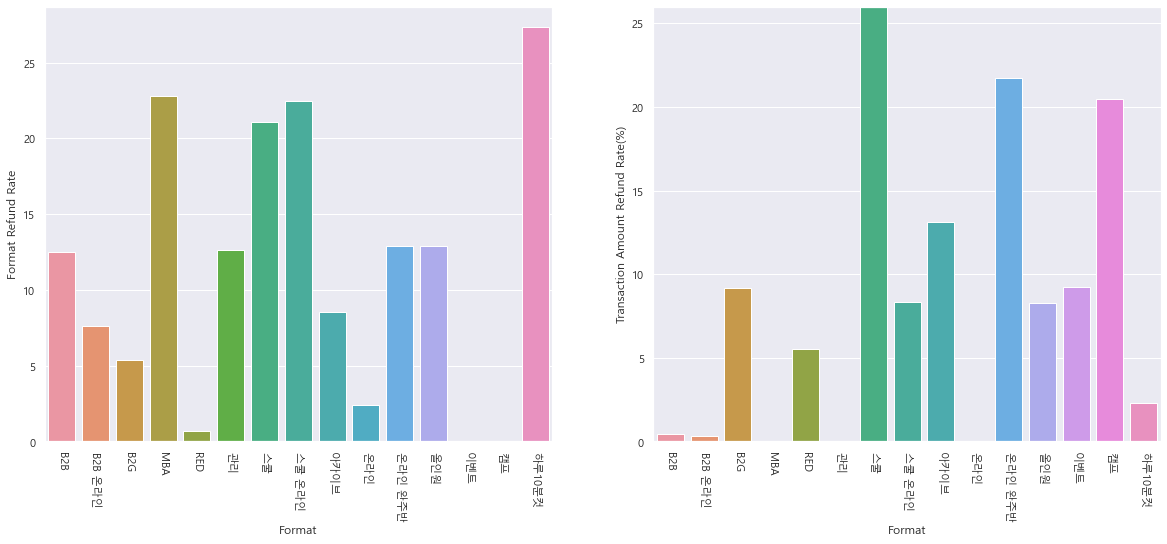

In [28]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot( x=format_array, y=format_refund_rate ,)
plt.xticks(rotation=-90)
plt.ylabel('Format Refund Rate')
plt.xlabel('Format')

plt.subplot(1, 2, 2)
sns.barplot(x=format_array, y=transaction_amount_refund_rate,  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Refund Rate(%)')
plt.ylim(0, 26)
plt.show()

- 하루10분컷의 환불율이 높은 것을 확인되어 format의 보강 작업과 앞서 제시한 전략을 합하여 좀 더 집중적인 관리가 필요한 것으로 보인다. 
- B2B(기업강의)의 환불율이 높은것을 확인 할 수 있는데 환불금액적 비율은 작은 것으로 확인된다.
- 온라인 완주반 format은 환불율에 비해 환불금액이 큰것으로 확인되어 세부사항을 파악해 보기로 하였다.
- MBA format은 환불율이 비해 환불금액을 찾을 수 없이 작은 것으로 확인되어 조사를 보류하도록 하였다.

format별 환불율과 금액별 환불율 Chart 비교

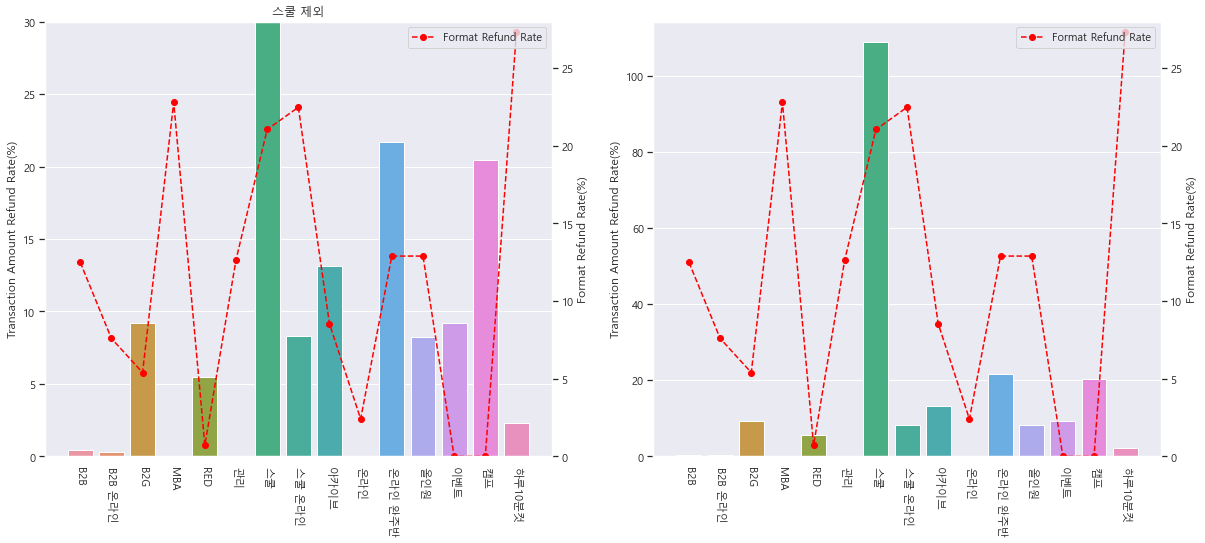

In [29]:
# temp_df 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('스쿨 제외')
lns1 = sns.barplot(x=format_array, y=transaction_amount_refund_rate )
lns1.set_ylim(0, 30)
lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-90)

# ax2는 lns1에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)

plt.subplot(1, 2, 2)
lns1 = sns.barplot(x=format_array, y=transaction_amount_refund_rate )

lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-90)

# ax2는 lns1에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)
plt.show()


- 환불 횟수비율과 환불 금액 비율 시각화

format별 금액과 환부율 Chart 비교

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


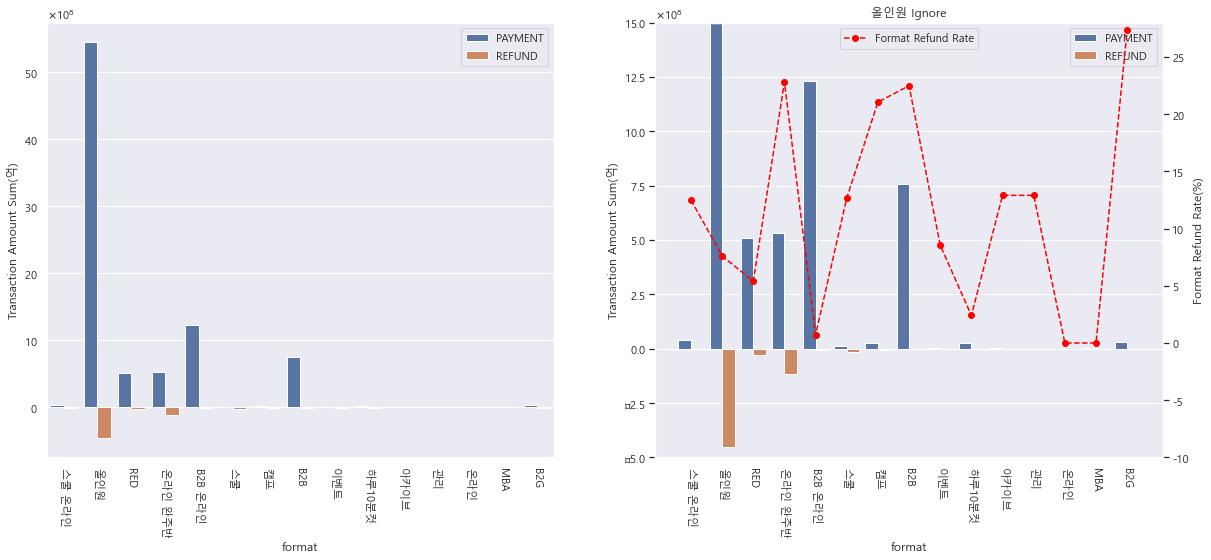

In [30]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

plt.subplot(1, 2, 2)
plt.title('올인원 Ignore')
lns1 = sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylim(-500000000, 1500000000)
lns1.set_ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper center')
ax2.set_ylim(-10, 28)
plt.show()


## B2B 구매 고객 세부분석

B2B 고객 선별

In [31]:
df_B2B = df.loc[(df.format == 'B2B') | (df.format == 'B2B 온라인'), : ]
df_B2B

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
254,"972,364.0","478,743.0","204,039.0",PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,"100,000.0",NaN,NaN,NaN,PG,TRANSFER,NaN,NaT
255,"972,365.0","478,745.0","203,352.0",PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,"750,000.0",NaN,NaN,NaN,PG,TRANSFER,NaN,NaT
461,"973,331.0","479,082.0","204,387.0",PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,"600,000.0",NaN,NaN,"600,000.0",PG,CARD,NaN,NaT
467,"973,363.0","474,327.0","204,387.0",PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,"600,000.0",NaN,NaN,"600,000.0",PG,CARD,NaN,NaT
520,"973,592.0","479,185.0","204,387.0",PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,"600,000.0",NaN,NaN,"600,000.0",PG,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56300,"1,361,297.0","669,386.0","207,667.0",PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,"390,000.0",NaN,NaN,NaN,PG,TRANSFER,NaN,NaT
56301,"1,361,312.0","669,400.0","207,555.0",PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,"1,200,000.0",NaN,NaN,NaN,PG,TRANSFER,NaN,NaT
56360,"1,367,252.0","672,301.0","207,714.0",PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,"2,000,000.0",NaN,NaN,NaN,PG,ONSITE,NaN,NaT
56538,"1,367,258.0","672,307.0","207,731.0",PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,"600,000.0",NaN,NaN,NaN,PG,ONSITE,NaN,NaT


B2B 구매고객 재구매율

In [32]:
customer_num = df_B2B['customer_id'].nunique()
total_purchase_num  = df_B2B['customer_id'].count() - df_B2B.loc[df_B2B.type=='REFUND']['customer_id'].count()
repurchase_rate = (total_purchase_num - customer_num) / total_purchase_num
print('B2B 재구매율 : %.2f' % repurchase_rate + '%')

B2B 재구매율 : 0.05%


세부내역

In [33]:
# 쿠폰 지급 없음
df_B2B['coupon_title'].unique()

array([nan], dtype=object)

In [34]:
df_B2B_online = df.loc[df.format == 'B2B 온라인', : ]
df_B2B_ = df.loc[df.format == 'B2B', : ]

print(f'B2B course_title : {df_B2B_.course_title.nunique()}, category_title : {df_B2B_.category_title.nunique()}' )
print(f'B2B 온라인 course_title : {df_B2B_online.course_title.nunique()}, category_title : {df_B2B_online.category_title.nunique()}' )
print('B2B 온라인과 B2B의 코스 중복 확인 :', pd.merge(df_B2B_online, df_B2B_, left_on='course_title', right_on='course_title',how='inner').index)

B2B course_title : 58, category_title : 6
B2B 온라인 course_title : 903, category_title : 9
B2B 온라인과 B2B의 코스 중복 확인 : Index([], dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


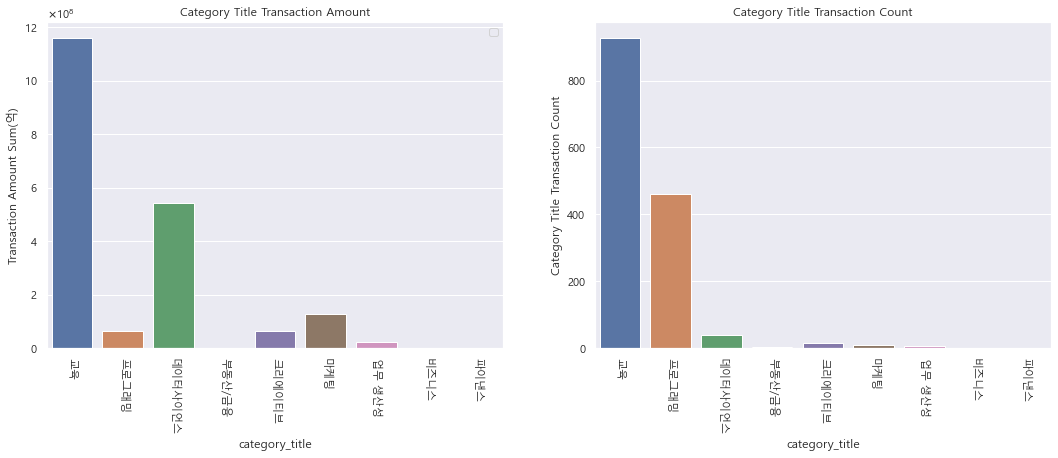

In [35]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title('Category Title Transaction Amount')
sns.barplot(data=df_B2B, x='category_title', y='transaction_amount', ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')

plt.subplot(1, 2, 2)
plt.title('Category Title Transaction Count')
sns.countplot(data=df_B2B, x='category_title')
plt.xticks(rotation=-90)
plt.ylabel('Category Title Transaction Count')

plt.show()

- 현재 진행 중인 기업 맞춤형 강의의 형식에서 매출율이 높은 교육, 데이터사이언스를 유지 관리하고  
- 마케팅과 수요가 많은 프로그램밍을 집중적으로 강의 생성과 보강하는 것을 추천한다.

### 올인원 고객 구매 세부 분석

In [36]:
cond = df['format'] == '올인원'
all_in_one=df.loc[cond]

구매와 환불로 나누어 확인

In [37]:
all_in_one_payment = all_in_one.loc[all_in_one.type == 'PAYMENT', :]
all_in_one_refund = all_in_one.loc[all_in_one.type == 'REFUND', :]

코스별 확인

In [38]:
all_in_one_refund['course_title'].unique()[:10]

array(['초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰',
       '프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스)',
       '올인원 패키지 : Financial Modeling', '초격차 패키지 : 한번에 끝내는 디자인 툴',
       '프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스)', '합격 패스 : ADsP',
       '초격차 패키지 : 한번에 끝내는 모션그래픽', '올인원 패키지 : Android 앱 개발',
       '올인원 패키지 : 네트워크와 보안 핵심 요약'], dtype=object)

코스안에서도 세부 타이틀로 나누어 정리 ['올인원', '초격차', '프로모션', '나머지']

In [39]:
# course_title별 정리
def course_divide(cour_titile):
    if  '올인원' in cour_titile:
        course_ = '올인원'
    elif  '초격차' in cour_titile:
        course_ = '초격차'
    elif  '프로모션' in cour_titile:
        course_ = '프로모션'
    else:
        course_ = '나머지'
    return course_

all_in_one_payment['course_divide'] = all_in_one_payment['course_title'].apply(lambda x: course_divide(x))
all_in_one_refund['course_divide'] = all_in_one_refund['course_title'].apply(lambda x: course_divide(x))

C:\Users\hojun\AppData\Local\Temp\ipykernel_29104\3082169613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_in_one_payment['course_divide'] = all_in_one_payment['course_title'].apply(lambda x: course_divide(x))
C:\Users\hojun\AppData\Local\Temp\ipykernel_29104\3082169613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_in_one_refund['course_divide'] = all_in_one_refund['course_title'].apply(lambda x: course_divide(x))


나머지 중에서 중복여부 확인

In [40]:
all_in_one_refund[all_in_one_refund['course_divide']=='나머지']['course_title'].unique()

array(['합격 패스 : ADsP', '연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+',
       '부동산 디벨로퍼 아카데미 : 주거용 수익형 부동산 개발', '합격 패스 : 데이터베이스와 SQLD',
       '연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+', '[한정판매] 딥러닝 끝장 패키지(~4월)',
       '부동산 디벨로퍼 아카데미 : 토지 개발', '부동산 디벨로퍼 아카데미 : 인허가',
       '바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식', '합격 패스 : 정보처리기사 필기&실기',
       '글로벌 엑스퍼트: 캐글 1위와 풀어보는 머신러닝 입문 트레이닝', '[한정판매] 자연어 A-Z 끝장 패키지(~4월)',
       '부동산 디벨로퍼 아카데미 : 부동산 마케팅',
       '글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)',
       '글로벌 엑스퍼트 : GAN 딥러닝 완벽 가이드 with 글로벌 엔지니어', 'REC.ON : VC',
       '[한정판매] 자연어 A-Z 끝장 패키지(~6월)', '나의 칼퇴치트키 엑셀유치원',
       '[한정판매] 자연어 A-Z 끝장 패키지(~8월)', '용호수의 돈 버는 실전 영상 제작',
       '편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨업하기!',
       '부동산 디벨로퍼 아카데미 : 상업용/숙박용 부동산 개발 The Real'], dtype=object)

코스별 구매, 환불 개수와 금액 확인

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

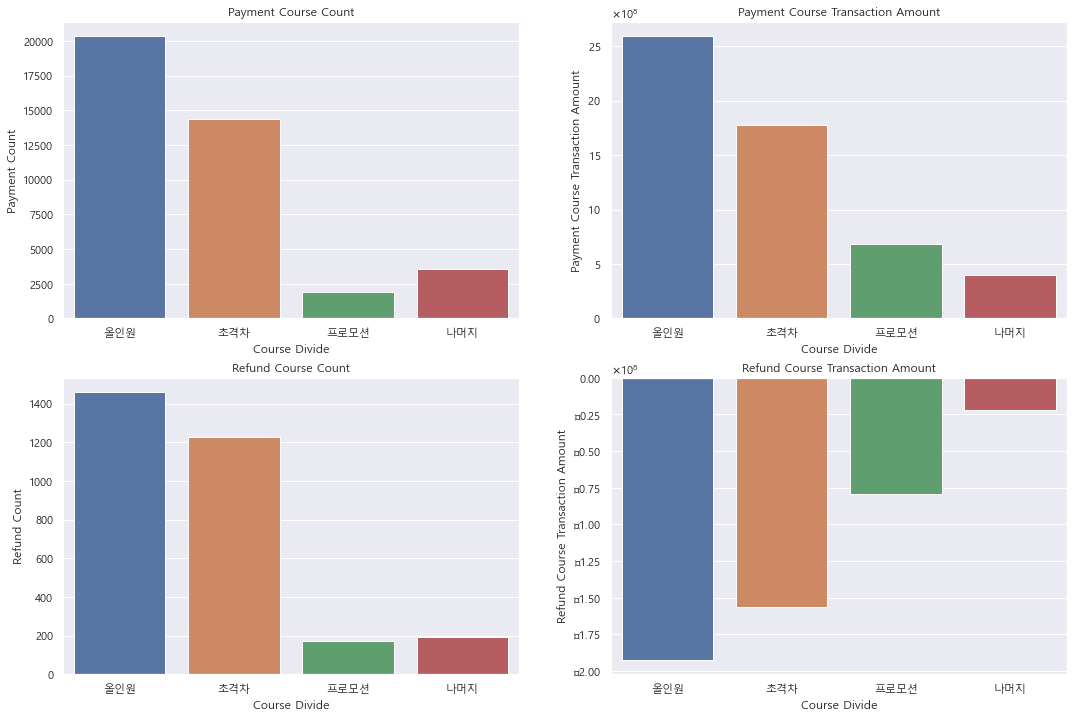

In [41]:
course_names = ['올인원', '초격차', '프로모션', '나머지']
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
plt.title('Payment Course Count')
sns.countplot(data=all_in_one_payment, x='course_divide', order=course_names)
plt.xlabel('Course Divide')
plt.ylabel('Payment Count')

plt.subplot(2,2,2)
plt.title('Payment Course Transaction Amount')
sns.barplot(data=all_in_one_payment, x='course_divide', y='transaction_amount', ci=None, estimator=np.sum, order=course_names)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Course Divide')
plt.ylabel('Payment Course Transaction Amount')

plt.subplot(2,2,3)
plt.title('Refund Course Count')
sns.countplot(data=all_in_one_refund, x='course_divide', order=course_names)
plt.xlabel('Course Divide')
plt.ylabel('Refund Count')

plt.subplot(2,2,4)
plt.title('Refund Course Transaction Amount')
sns.barplot(data=all_in_one_refund, x='course_divide', y='transaction_amount', ci=None, estimator=np.sum, order=course_names)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Course Divide')
plt.ylabel('Refund Course Transaction Amount')

plt.show()

In [104]:
all_in_one_refund_compare = all_in_one_refund.copy()
all_in_one_refund_compare = all_in_one_refund_compare.drop(all_in_one_refund_compare[all_in_one_refund_compare['sale_price'].isna()].index)
all_in_one_refund_compare['compare'] = all_in_one_refund_compare['transaction_amount'] + all_in_one_refund_compare['sale_price']

print(f'올인원 총 환불수 : {all_in_one_refund_compare.shape[0]}')
print(f'올인원 수강전 환불수 :', all_in_one_refund_compare[all_in_one_refund_compare['compare'] == 0].shape[0])
print(f'올인원 수강전 환불비율:', format(round(all_in_one_refund_compare[all_in_one_refund_compare['compare'] == 0].shape[0]/all_in_one_refund_compare.shape[0]*100, 2))+'%')
print(f'올인원 수강전 환불금액:', format(round(abs(all_in_one_refund_compare['transaction_amount'].sum())), ',')+'원')

올인원 총 환불수 : 3047
올인원 수강전 환불수 : 1613
올인원 수강전 환불비율: 52.94%
올인원 수강전 환불금액: 449,760,264원


- 올인원 format 환불의 절반이 수업을 듣기 전에 취소한 것으로 나타났다. 
- 고객이 구매 후 빠른 피드백을 주는 전략을 추천한다
- 예) 강의를 수강 후 만들거나 할 수 있는 작업물들을 보여주는 영상을 팝업해줘서 학습의욕을 강하게 만든다.